In [28]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import TopKCategoricalAccuracy
import matplotlib.pyplot as plt
import numpy as np

In [29]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = r"data\train"
test_data_dir = r"data\test"

In [30]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width), 
    batch_size=batch_size,
    class_mode='categorical')

Found 752 images belonging to 100 classes.


In [31]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width), 
    batch_size=1,
    class_mode='categorical')

Found 248 images belonging to 100 classes.


In [32]:
x, y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [34]:
cp_callback = ModelCheckpoint(
    filepath=".\checkpoints\cp-{epoch:02d}.h5", 
    verbose=1, 
    save_weights_only=True,
    save_freq='epoch',
    period=10
)

In [36]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
        
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy', TopKCategoricalAccuracy()])

history = model.fit(train_generator, 
                    epochs = 50,
                    callbacks=[cp_callback]
                   )

Epoch 1/50
24/24 [==============================] - 69s 3s/step - loss: 5.2545 - accuracy: 0.0133 - top_k_categorical_accuracy: 0.0931
Epoch 2/50
24/24 [==============================] - 55s 2s/step - loss: 3.8343 - accuracy: 0.1609 - top_k_categorical_accuracy: 0.3497
Epoch 3/50
24/24 [==============================] - 76s 3s/step - loss: 3.1499 - accuracy: 0.2646 - top_k_categorical_accuracy: 0.5412
Epoch 4/50
24/24 [==============================] - 93s 4s/step - loss: 2.5506 - accuracy: 0.3896 - top_k_categorical_accuracy: 0.6596
Epoch 5/50
24/24 [==============================] - 100s 4s/step - loss: 2.1517 - accuracy: 0.4641 - top_k_categorical_accuracy: 0.7380
Epoch 6/50
24/24 [==============================] - 98s 4s/step - loss: 1.6660 - accuracy: 0.5944 - top_k_categorical_accuracy: 0.8364
Epoch 7/50
24/24 [==============================] - 92s 4s/step - loss: 1.3374 - accuracy: 0.6822 - top_k_categorical_accuracy: 0.8949
Epoch 8/50
24/24 [==============================] - 10

In [37]:
model.save('model-50epoch.h5')

# Ranking

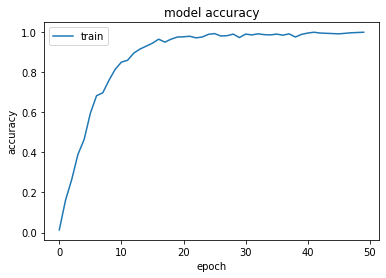

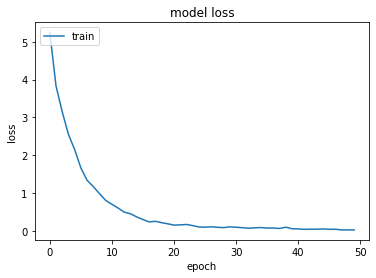

In [38]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
test_loss, test_acc, test_rank5 = model.evaluate(test_generator, verbose=2)

248/248 - 30s - loss: 4.3257 - accuracy: 0.3024 - top_k_categorical_accuracy: 0.5605

Test accuracy:  0.30241936445236206
